<hr>
<hr>

# Visualizações em Python (Parte II)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Resumo Aula anterior

In [3]:
df_chuvas = pd.read_csv('../bases/pune_1965_to_2002.csv')
df_chuvas.head(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.0,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.0,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132


Text(0.5, 0, 'Mês')

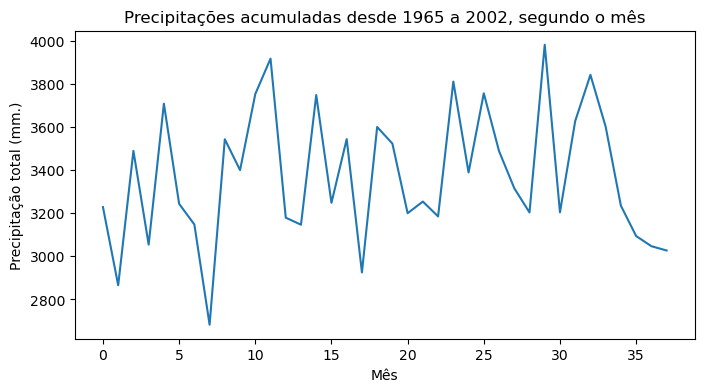

In [8]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(df_chuvas.index, df_chuvas.sum(axis='columns'), label='Precipitações acumuladas')
#ax.bar(df_chuvas.columns, df_chuvas.sum())
#ax.hist(df_chuvas.values.flatten(), bins=10)
#ax.plot(df_chuvas.index, df_chuvas['Jan'], label='Precipitações de janeiro')
#ax.plot(df_chuvas.index, df_chuvas['Feb'], label='Precipitações de fevereiro', color='C1')

ax.set_title('Precipitações acumuladas desde 1965 a 2002, segundo o mês')
ax.set_ylabel('Precipitação total (mm.)')
ax.set_xlabel('Mês')

# Subgráficos

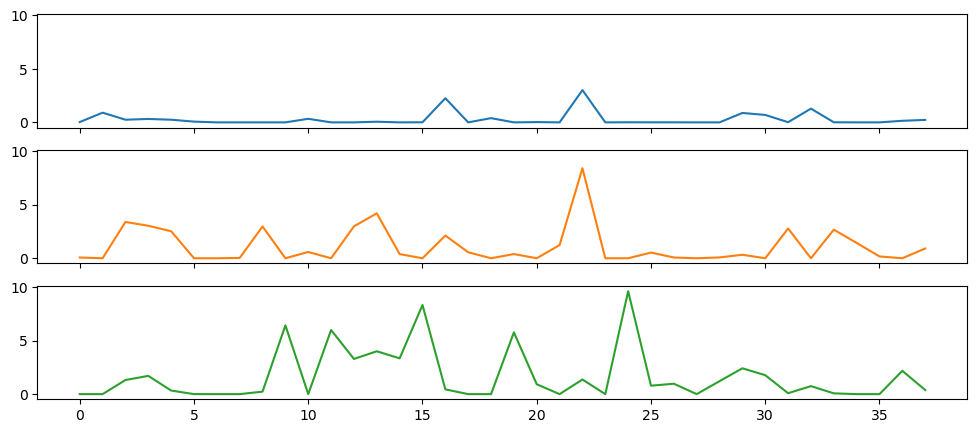

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(df_chuvas.index, df_chuvas['Jan'], label='Precipitações de janeiro')
ax[1].plot(df_chuvas.index, df_chuvas['Feb'], label='Precipitações de fevereiro', color='C1')
ax[2].plot(df_chuvas.index, df_chuvas['Mar'], label='Precipitações de março', color='C2')

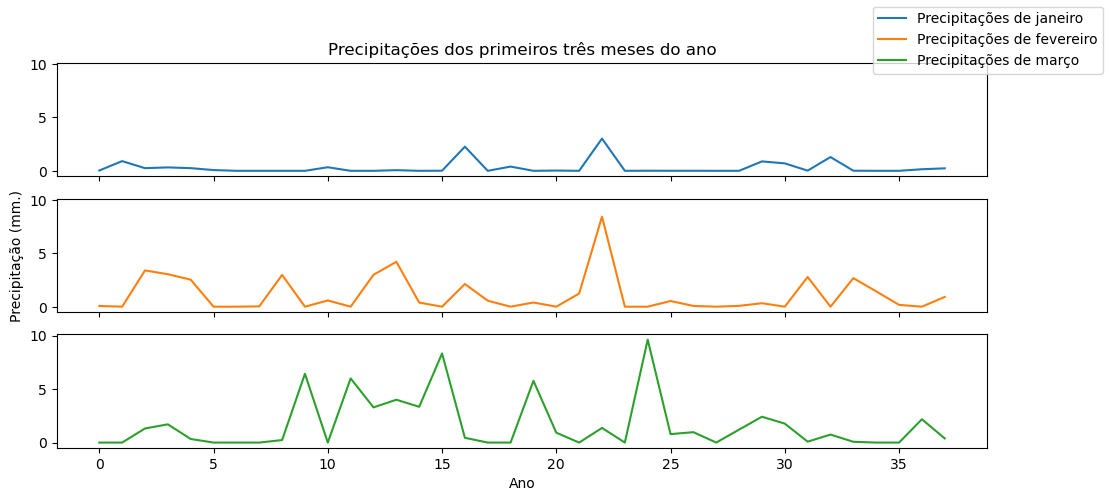

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(df_chuvas.index, df_chuvas['Jan'], label='Precipitações de janeiro')
ax[1].plot(df_chuvas.index, df_chuvas['Feb'], label='Precipitações de fevereiro', color='C1')
ax[2].plot(df_chuvas.index, df_chuvas['Mar'], label='Precipitações de março', color='C2')

ax[0].set_title('Precipitações dos primeiros três meses do ano') 
ax[2].set_xlabel('Ano')  
ax[1].set_ylabel('Precipitação (mm.)')

ax[0].legend()  
ax[1].legend()
ax[2].legend() 

#fig.legend() 

<hr>
<hr>

# Personalizando o Matplotlib

In [13]:
#mpl.rcParams.keys()


In [14]:
mpl.rcParams['axes.titleweight'] = 'bold' 
mpl.rcParams['axes.titlelocation'] = 'left' 
mpl.rcParams['axes.titlecolor'] = 'firebrick' 
mpl.rcParams['axes.labelcolor'] = 'blue' 
mpl.rcParams['axes.labelsize'] = '10' 
mpl.rcParams['axes.labelweight'] = 'light' 
mpl.rcParams['axes.linewidth'] = '1' 
mpl.rcParams['grid.color'] = 'black' 
mpl.rcParams['grid.linestyle'] = '-.' 
mpl.rcParams['grid.linewidth'] = '2' 


Text(0, 0.5, '(Etiqueta eixo vert.)')

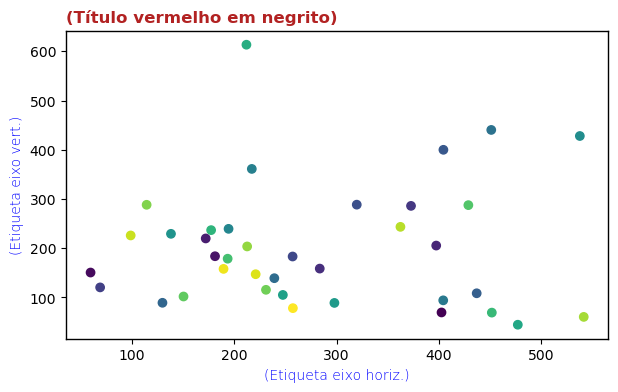

In [15]:
fig, ax = plt.subplots(figsize=(7, 4))  
ax.scatter(df_chuvas['Aug'], df_chuvas['Sep'], c=df_chuvas.index)
ax.set_title('(Título vermelho em negrito)')
ax.set_xlabel('(Etiqueta eixo horiz.)')
ax.set_ylabel('(Etiqueta eixo vert.)')

retorna as configuracoes padrao

In [17]:
mpl.rcParams.update(mpl.rcParamsDefault)

mostrar grafico no notebook

In [19]:
%matplotlib inline

Text(0, 0.5, '(Etiqueta eixo vert.)')

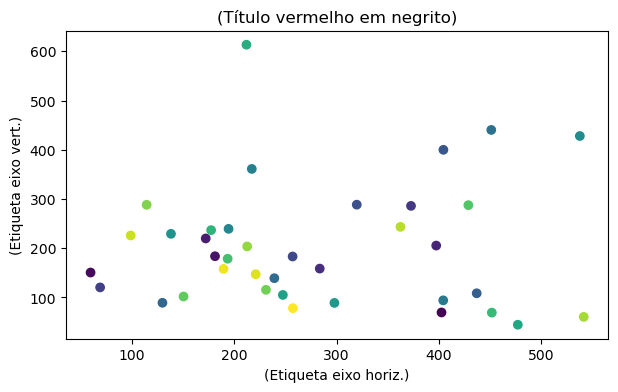

In [20]:
fig, ax = plt.subplots(figsize=(7, 4))  
ax.scatter(df_chuvas['Aug'], df_chuvas['Sep'], c=df_chuvas.index)
ax.set_title('(Título vermelho em negrito)')
ax.set_xlabel('(Etiqueta eixo horiz.)')
ax.set_ylabel('(Etiqueta eixo vert.)')


<hr> <hr>

# Seaborn

In [45]:
sns.set()

Id: 	número identificador da pessoa

Diet: dieta da pessoa		com gorduras ou sem gorduras

Time: duração do exercício		1 min, 15 min ou 30 min

Kind: tipo de exercício		repouso, caminhar ou correr

In [22]:
df_exercicio = sns.load_dataset('exercise')
df_exercicio = df_exercicio.drop('Unnamed: 0', axis='columns')
df_exercicio.head()


,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [23]:
df_exercicio.shape

(90, 5)

In [24]:
df_30_min = df_exercicio[df_exercicio['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


## Distribuições 

<Figure size 640x480 with 0 Axes>

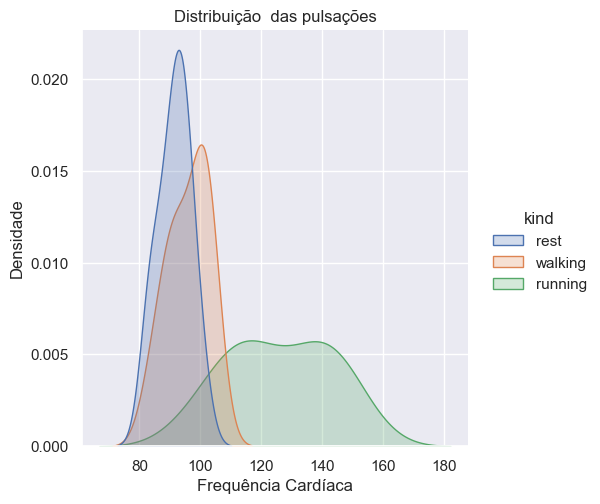

In [46]:
plt.figure()
ax = sns.displot(data=df_30_min, 
                 x='pulse', 
                 hue='kind', 
                 kind='kde', 
                 fill=True, 
                )
ax.set(xlabel='Frequência Cardíaca', 
       ylabel='Densidade', 
       title='Distribuição  das pulsações')

- Com o parâmetro __kind='kde'__, Seaborn realiza uma estimativa da distribuição dos dados no dataframe. Em termos gerais, você pode pensar nesses tipos de gráficos como uma versão suavizada do histograma de frequências relativas. 
- Com o parâmetro __kind='hist'__,Seaborn irá traçar um histograma.
- O parâmetro __fill__ adiciona o preenchimento debaixo da distribuição.
- O parâmetro __hue__ determina a coluna categorica que define as cores do grafico. 

<Figure size 640x480 with 0 Axes>

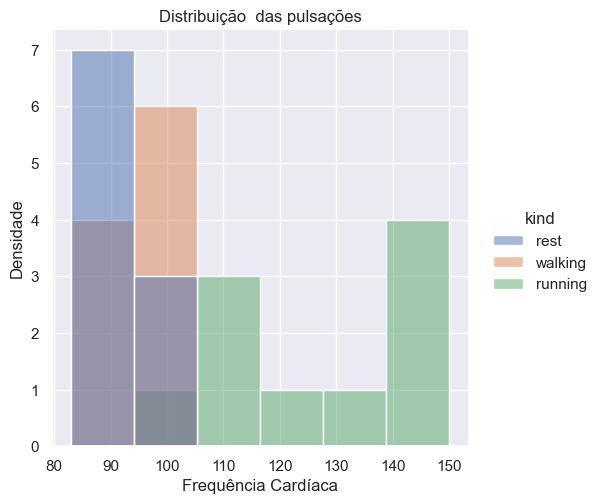

In [37]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='hist', hue='kind', fill=True)
ax.set(xlabel='Frequência Cardíaca', ylabel='Densidade', title='Distribuição  das pulsações')

### Editando Temas ou cores

<Figure size 640x480 with 0 Axes>

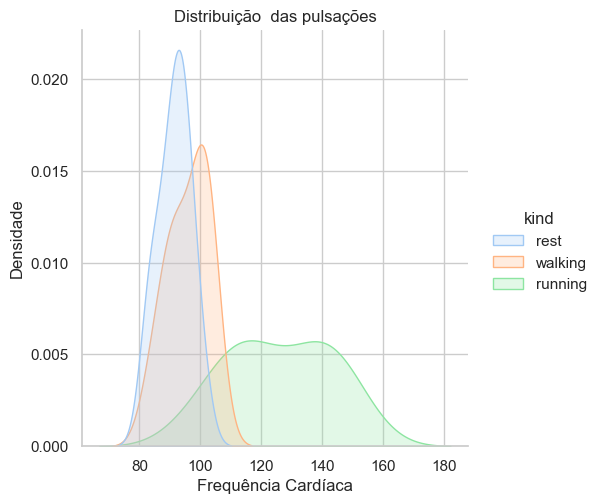

In [52]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure()
ax = sns.displot(data=df_30_min, 
                 #palette = {"rest":"red", "walking":"blue", "running":"green"},
                 x='pulse', 
                 kind='kde', 
                 hue='kind', 
                 fill=True)
ax.set(xlabel='Frequência Cardíaca', ylabel='Densidade', title='Distribuição  das pulsações')


In [53]:
#voltar ao normal
sns.set()

## Categorical Plots

In [30]:
df_exercicio.head(2)

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest


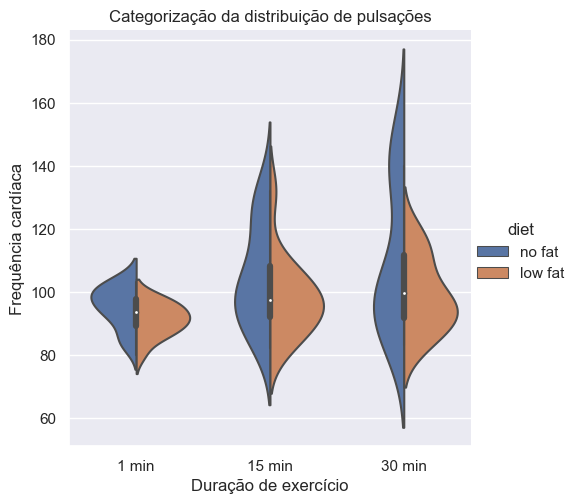

In [41]:
ax = sns.catplot(data=df_exercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)

ax.set(xlabel='Duração de exercício', 
       ylabel='Frequência cardíaca', 
       title='Categorização da distribuição de pulsações')

x='kind'

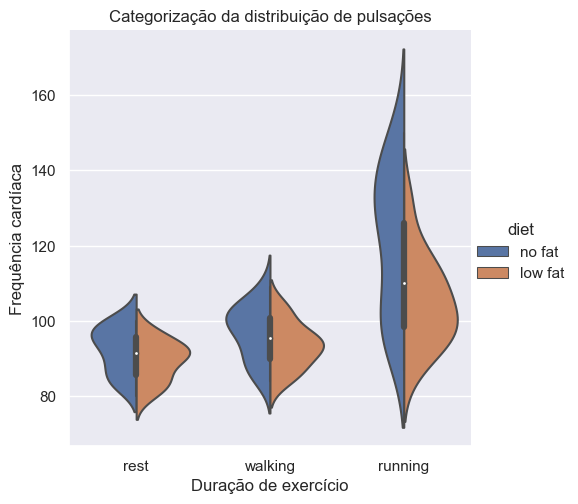

In [42]:
ax = sns.catplot(data=df_exercicio, kind='violin', x='kind', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duração de exercício', ylabel='Frequência cardíaca', title='Categorização da distribuição de pulsações')

# Exercício

Distribuição das Frequências cardíacas por duração do exercício.

In [43]:
df_exercicio = sns.load_dataset('exercise')
df_exercicio.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


<Figure size 640x480 with 0 Axes>

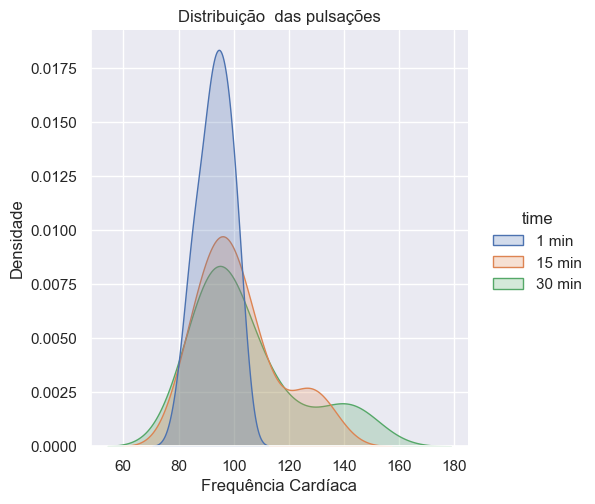

In [36]:
plt.figure()
ax = sns.displot(data=df_exercicio, x='pulse', kind='kde', hue='time', fill=True)
ax.set(xlabel='Frequência Cardíaca', ylabel='Densidade', title='Distribuição  das pulsações')